# Calculando fingerprints a mano usando python

Esto es un procedimiento meramente pedagógico, para que vean como es el procedimiento para transformar información química en forma de bits encendidos (1) y almacenados en una cadena de bits.

Adaptado de la guía ["A beginner's guide for understanding Extended-Connectivity Fingerprints (ECFPs)"](https://chemicbook.com/2021/03/25/a-beginners-guide-for-understanding-extended-connectivity-fingerprints.html) de Manish Kumar.

Arrancamos con la molécula que está en los slides (butiramida).

In [2]:
# install rdkit first
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 37.3 MB/s eta 0:00:00


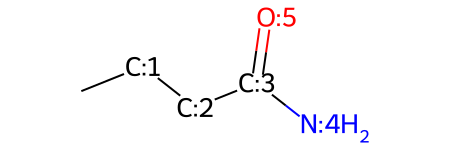

In [3]:
# SMILES for butyramide
butyramide = "CCCC(N)=O"

# import rdkit modules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors

# nuestra molecula
mol = Chem.MolFromSmiles(butyramide)

#fijar (set) el número (indice = Idx) de átomo para cada átomo de la molécula
for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())

# Veamos la molécula
mol


### Step 1 - Assigning an integer identifier to each atom

Let’s try this out for our atom no. 3 in our new molecule Butyramide and calculate the identifier. First, let’s calculate all seven properties:

 - Number of non-hydrogen immediate neighbors = 3 (atom 2, 4, and 5)
 - Valency minus the number of connected hydrogens = 4 (4 - 0)
 - Atomic number = 6
 - Atomic mass = 12
 - Atomic charge = 0
 - Number of attached hydrogens = 0
 - Is it a part of a ring = 0 (no)

So, `i3 = (3, 4, 6, 12, 0, 0, 0)`

Now, hashing this tuple in python:

In [1]:

i3 = hash((3, 4, 6, 12, 0, 0, 0))
print(i3)

-5700861834356229464


In [4]:
# que hace la funcion hash?
help(hash)

Help on built-in function hash in module builtins:

hash(obj, /)
    Return the hash value for the given object.
    
    Two objects that compare equal must also have the same hash value, but the
    reverse is not necessarily true.



Ahora calculamos el hash para el resto de los átomos. Recordar que el conjunto de numeros surge de evaluar las preguntas(entorno, enlaces, atomo, etc) en cada caso.

In [ ]:
# identificadores para cada atomo
i0 = hash((1, 1, 6, 12, 0, 3, 0)) # -CH3
i1 = hash((2, 2, 6, 12, 0, 2, 0)) # -CH2
i2 = hash((2, 2, 6, 12, 0, 2, 0)) # -CH2
i3 = hash((3, 4, 6, 12, 0, 0, 0)) # -C
i4 = hash((1, 2, 7, 14, 0, 0, 0)) # -NH2
i5 = hash((1, 2, 8, 16, 0, 0, 0)) # =O
list_identifiers = [i0, i1, i2, i3, i4, i5]

print(
"0:", i0, "\n",
"1:", i1, "\n",
"2:", i2, "\n",
"3:", i3, "\n",
"4:", i4, "\n",
"5:", i5
)

i = 1
for id in list_identifiers:
  print("atomo", i, id)
  i += 1

0: 4940186308562569707 
 1: -7815985147897826576 
 2: -7815985147897826576 
 3: -5700861834356229464 
 4: -6296387744277800866 
 5: 8618411755682373892
atomo 1 4940186308562569707
atomo 2 -7815985147897826576
atomo 3 -7815985147897826576
atomo 4 -5700861834356229464
atomo 5 -6296387744277800866
atomo 6 8618411755682373892


### Step 2 - Iteratively updating the atom identifiers

 1. First, an array is initialized containing the iteration number and the initial identifier of the atom in question. For example, for the first iteration of atom no. 3 in Butyramide, the array will be:
`[(1, -5700861834356229464)]`

 2. Next, we add two more numbers to this array for each non-hydrogen neighbor. The first of these numbers is the bond order with that particular atom and the second is that atom’s current identifier. Values 1, 2, 3, and 4 are used for single, double, triple, and aromatic bonds, respectively. Further, to avoid any ordering dependency in this attachment list, the attachments are sorted using their number pairs.

 For example, atom 3 is connected to 4, 2, and 5 with a single, single and double bond, respectively. The feature array will now become:

 `[(1, -5700861834356229464), (1, -6296387744277800866), (1, -7815985147897826576), (2, 8618411755682373892)]`



In [ ]:
i3_actualizado_list = [1, -5700861834356229464, 1, -6296387744277800866, 1, -7815985147897826576, 2, 8618411755682373892]
i3_actualizado = hash(tuple(i3_actualizado_list))
print(i3_actualizado)

-6784272694619664722


This process is repeated for all atoms for a prespecified number of iterations. the updated values after first iteration will be:

In [ ]:
i0_actualizado_list = [1, 4940186308562569707, 1, -7815985147897826576]
i1_actualizado_list = [1, -7815985147897826576, 1, 4940186308562569707, 1, 7815985147897826576]
i2_actualizado_list = [1, -7815985147897826576, 1, -7815985147897826576, 1, -5700861834356229464]
i3_actualizado_list = [1, -5700861834356229464, 1, -6296387744277800866, 1, -7815985147897826576, 2, 8618411755682373892]
i4_actualizado_list = [1, -6296387744277800866, 1, -5700861834356229464]
i5_actualizado_list = [1, 8618411755682373892, 2, -5700861834356229464]

i0_actualizado = hash(tuple(i0_actualizado_list))
i1_actualizado = hash(tuple(i1_actualizado_list))
i2_actualizado = hash(tuple(i2_actualizado_list))
i3_actualizado = hash(tuple(i3_actualizado_list))
i4_actualizado = hash(tuple(i4_actualizado_list))
i5_actualizado = hash(tuple(i5_actualizado_list))
print(
    "0:", i0_actualizado, "\n"
    "1:", i1_actualizado, "\n"
    "2:", i2_actualizado, "\n"
    "3:", i3_actualizado, "\n"
    "4:", i4_actualizado, "\n"
    "5:", i5_actualizado
)

list_identifiers.append(i0_actualizado)
list_identifiers.append(i1_actualizado)
list_identifiers.append(i2_actualizado)
list_identifiers.append(i3_actualizado)
list_identifiers.append(i4_actualizado)
list_identifiers.append(i5_actualizado)

0: 8584567434288380245 
1: -3850421845015274725 
2: 3684471100094014610 
3: -6784272694619664722 
4: 3050449913299447144 
5: -1021098423391490395


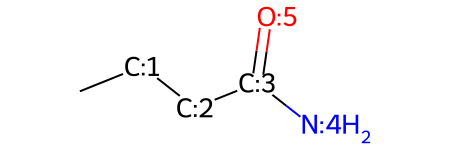

In [ ]:
mol

NOTE: Notice how the atom 2 and 3 have the same identifier after initial iteration but it changes after the first iteration. Think why?

This is because the atoms are identical when we just look at them individually but becomes different when looking at their environment (Atom 2 is connected to a -CH3 group while atom 3 is connected to a -C(=O)NH2 group).

Similarly, for the second iteration, we’ll do the exact same thing but this time we’ll use the updated identifiers. To say it differently, we used identifiers from initial iteration to get values for the first iteration. The same way, we’ll use the identifiers from first iteration to get values for the second iteration.

In [ ]:
i0_actualizado_list = [2, 8584567434288380245, 1, -3850421845015274725]
i1_actualizado_list = [2, -3850421845015274725, 1, 8584567434288380245, 1, 3684471100094014610]
i2_actualizado_list = [2, 3684471100094014610, 1, -3850421845015274725, 1, -6784272694619664722]
i3_actualizado_list = [2, -6784272694619664722, 1, 3684471100094014610, 1, 3050449913299447144, 2, -1021098423391490395]
i4_actualizado_list = [2, 3050449913299447144, 1, -6784272694619664722]
i5_actualizado_list = [2, -1021098423391490395, 2, -6784272694619664722]

i0_actualizado = hash(tuple(i0_actualizado_list))
i1_actualizado = hash(tuple(i1_actualizado_list))
i2_actualizado = hash(tuple(i2_actualizado_list))
i3_actualizado = hash(tuple(i3_actualizado_list))
i4_actualizado = hash(tuple(i4_actualizado_list))
i5_actualizado = hash(tuple(i5_actualizado_list))

print(
    "0:", i0_actualizado, "\n"
    "1:", i1_actualizado, "\n"
    "2:", i2_actualizado, "\n"
    "3:", i3_actualizado, "\n"
    "4:", i4_actualizado, "\n"
    "5:", i5_actualizado
)

list_identifiers.append(i0_actualizado)
list_identifiers.append(i1_actualizado)
list_identifiers.append(i2_actualizado)
list_identifiers.append(i3_actualizado)
list_identifiers.append(i4_actualizado)
list_identifiers.append(i5_actualizado)

0: 8941243776032896467 
1: -787754659025970831 
2: 3218585409923913960 
3: -3645384617475278016 
4: 7750922617236563859 
5: 6741875388395483351


In [ ]:
list_identifiers

[4940186308562569707,
 -7815985147897826576,
 -7815985147897826576,
 -5700861834356229464,
 -6296387744277800866,
 8618411755682373892,
 8584567434288380245,
 -3850421845015274725,
 3684471100094014610,
 -6784272694619664722,
 3050449913299447144,
 -1021098423391490395,
 8941243776032896467,
 -787754659025970831,
 3218585409923913960,
 -3645384617475278016,
 7750922617236563859,
 6741875388395483351]

In [ ]:
ids2 = [-4080868480043360372, 8311098529014133067, 8311098529014133067, -2155244659601281804, -3602994677767288312, 8573586092015465947, -3879702859024654160, 2648074263463118673, 9209025387859845960, 3790237506519639747, -8399737669368778010, 3271801898087186516, 7820245418060671737, -8234949431280515543, -5902629546112570760, -3660103599533977242, -5964710996914813053, 8916398073441202914]
print(len(ids2))
ids2

18


[-4080868480043360372,
 8311098529014133067,
 8311098529014133067,
 -2155244659601281804,
 -3602994677767288312,
 8573586092015465947,
 -3879702859024654160,
 2648074263463118673,
 9209025387859845960,
 3790237506519639747,
 -8399737669368778010,
 3271801898087186516,
 7820245418060671737,
 -8234949431280515543,
 -5902629546112570760,
 -3660103599533977242,
 -5964710996914813053,
 8916398073441202914]

In [ ]:
nodups = [-4080868480043360372, 8311098529014133067, -2155244659601281804, -3602994677767288312, 8573586092015465947, -3879702859024654160, 2648074263463118673, 9209025387859845960, 3790237506519639747, -8399737669368778010, 3271801898087186516, -8234949431280515543, -5902629546112570760, -3660103599533977242]
print(len(nodups))
nodups


14


[-4080868480043360372,
 8311098529014133067,
 -2155244659601281804,
 -3602994677767288312,
 8573586092015465947,
 -3879702859024654160,
 2648074263463118673,
 9209025387859845960,
 3790237506519639747,
 -8399737669368778010,
 3271801898087186516,
 -8234949431280515543,
 -5902629546112570760,
 -3660103599533977242]

In [ ]:
ids = [1191819827, -1104704513, -690148606, -798098402, -744082560, -1979958858, -1266712900,
       -1216914295, 78421366, -887929888, -276894788, 1687725933, 1844215264, -252457408,
       132019747, -2036474688, -1979958858]
for id in ids:
  print(id % 1024)


563
1023
770
30
896
438
700
137
374
992
956
877
480
576
547
192
438
1023


In [ ]:
-4080868480043360372 % 2048


1932

In [ ]:
-14439656419269748 % 2048

908